**Libraries**

In [73]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense 
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.utils import to_categorical
import tensorflow as tf
from sklearn.metrics import accuracy_score
from keras import callbacks
from keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

In [74]:
alex = pd.read_excel('data/lab6_train_data.xlsx', sheet_name='Alex')
kelly = pd.read_excel('data/lab6_train_data.xlsx', sheet_name='Kelly')
hunter = pd.read_excel('data/lab6_train_data.xlsx', sheet_name='Hunter')
test = pd.read_excel('data/lab6_train_data.xlsx', sheet_name='Test')

In [75]:
import os
import glob
from PIL import Image
import numpy as np
import pandas as pd

def load_and_flatten_images(root_dir,
                            exts=(".jpg", ".jpeg", ".png", ".bmp"),
                            target_size=(64, 64)):
    """
    Walks through `root_dir`, finds all image files, resizes, flattens,
    and returns a DataFrame with:
        - 'Image ID': the filename (no path)
        - pixel_0 ... pixel_n: flattened RGB pixel values
    """
    all_files = []
    for ext in exts:
        all_files.extend(glob.glob(os.path.join(root_dir, f"**/*{ext}"), recursive=True))

    rows = []
    for fp in all_files:
        try:
            img = Image.open(fp).convert("RGB")
        except Exception as e:
            print(f"✗ Could not open {fp}: {e}")
            continue

        if target_size is not None:
            img = img.resize(target_size, resample=Image.BILINEAR)

        arr = np.array(img) / 255.0
        flat = arr.reshape(-1)

        # Use cross-platform safe basename for the image file
        basename = os.path.basename(fp)
        row = [basename] + flat.tolist()
        rows.append(row)

    if not rows:
        return pd.DataFrame()

    num_pixels = target_size[0] * target_size[1] * 3
    col_names = ["Image ID"] + [f"pixel_{i}" for i in range(num_pixels)]
    df = pd.DataFrame(rows, columns=col_names)
    return df


In [76]:
#Alex Images
folder_path = "Alex_Kelly_Pics/Alex"
alex_images = load_and_flatten_images(folder_path, target_size=(64, 64))
print(alex_images.shape)         # e.g., (N_images, 1 + 224*224*3)
print(alex_images.columns[:5])  # ['filename', 'pixel_0', 'pixel_1', 'pixel_2', 'pixel_3']
print(alex_images.iloc[0, :10]) # show first image's name + first few pixel values

# If you really need a NumPy array for “everything but the filename”:
X = alex_images.drop(columns=["Image ID"]).to_numpy()   # shape = (N_images, 224*224*3)
filenames = alex_images["Image ID"].tolist()

(256, 12289)
Index(['Image ID', 'pixel_0', 'pixel_1', 'pixel_2', 'pixel_3'], dtype='object')
Image ID    Alex-Image119.png
pixel_0              0.345098
pixel_1              0.403922
pixel_2              0.462745
pixel_3              0.356863
pixel_4              0.423529
pixel_5              0.478431
pixel_6              0.368627
pixel_7              0.435294
pixel_8              0.494118
Name: 0, dtype: object
(256, 12289)
Index(['Image ID', 'pixel_0', 'pixel_1', 'pixel_2', 'pixel_3'], dtype='object')
Image ID    Alex-Image119.png
pixel_0              0.345098
pixel_1              0.403922
pixel_2              0.462745
pixel_3              0.356863
pixel_4              0.423529
pixel_5              0.478431
pixel_6              0.368627
pixel_7              0.435294
pixel_8              0.494118
Name: 0, dtype: object


In [77]:
#Kelly Images
folder_path = "Alex_Kelly_Pics/Kelly"
kelly_images = load_and_flatten_images(folder_path, target_size=(64, 64))
print(kelly_images.shape)         # e.g., (N_images, 1 + 224*224*3)
print(kelly_images.columns[:5])  # ['filename', 'pixel_0', 'pixel_1', 'pixel_2', 'pixel_3']
print(kelly_images.iloc[0, :10]) # show first image's name + first few pixel values

# If you really need a NumPy array for “everything but the filename”:
X = kelly_images.drop(columns=["Image ID"]).to_numpy()   # shape = (N_images, 224*224*3)
filenames = kelly_images["Image ID"].tolist()

(229, 12289)
Index(['Image ID', 'pixel_0', 'pixel_1', 'pixel_2', 'pixel_3'], dtype='object')
Image ID    Kelly-Image124.png
pixel_0               0.356863
pixel_1               0.341176
pixel_2               0.317647
pixel_3               0.360784
pixel_4               0.345098
pixel_5               0.317647
pixel_6                0.34902
pixel_7               0.333333
pixel_8               0.301961
Name: 0, dtype: object
(229, 12289)
Index(['Image ID', 'pixel_0', 'pixel_1', 'pixel_2', 'pixel_3'], dtype='object')
Image ID    Kelly-Image124.png
pixel_0               0.356863
pixel_1               0.341176
pixel_2               0.317647
pixel_3               0.360784
pixel_4               0.345098
pixel_5               0.317647
pixel_6                0.34902
pixel_7               0.333333
pixel_8               0.301961
Name: 0, dtype: object


In [78]:
#Hunter Images
folder_path = "Alex_Kelly_Pics/Hunter"
hunter_images = load_and_flatten_images(folder_path, target_size=(64, 64))
print(hunter_images.shape)         # e.g., (N_images, 1 + 224*224*3)
print(hunter_images.columns[:5])  # ['filename', 'pixel_0', 'pixel_1', 'pixel_2', 'pixel_3']
print(hunter_images.iloc[0, :10]) # show first image's name + first few pixel values

# If you really need a NumPy array for “everything but the filename”:
X = hunter_images.drop(columns=["Image ID"]).to_numpy()   # shape = (N_images, 224*224*3)
filenames = hunter_images["Image ID"].tolist()

(7, 12289)
Index(['Image ID', 'pixel_0', 'pixel_1', 'pixel_2', 'pixel_3'], dtype='object')
Image ID    Hunter-Image01.png
pixel_0               0.168627
pixel_1               0.196078
pixel_2                0.25098
pixel_3               0.207843
pixel_4               0.227451
pixel_5               0.266667
pixel_6                0.27451
pixel_7               0.286275
pixel_8               0.301961
Name: 0, dtype: object
(7, 12289)
Index(['Image ID', 'pixel_0', 'pixel_1', 'pixel_2', 'pixel_3'], dtype='object')
Image ID    Hunter-Image01.png
pixel_0               0.168627
pixel_1               0.196078
pixel_2                0.25098
pixel_3               0.207843
pixel_4               0.227451
pixel_5               0.266667
pixel_6                0.27451
pixel_7               0.286275
pixel_8               0.301961
Name: 0, dtype: object


In [79]:
#TestSet Images
folder_path = "Alex_Kelly_Pics/TestSet"
test_images = load_and_flatten_images(folder_path, target_size=(64, 64))
print(test_images.shape)         # e.g., (N_images, 1 + 224*224*3)
print(test_images.columns[:5])  # ['filename', 'pixel_0', 'pixel_1', 'pixel_2', 'pixel_3']
print(test_images.iloc[0, :10]) # show first image's name + first few pixel values

# If you really need a NumPy array for “everything but the filename”:
X = test_images.drop(columns=["Image ID"]).to_numpy()   # shape = (N_images, 224*224*3)
filenames = test_images["Image ID"].tolist()

(20, 12289)
Index(['Image ID', 'pixel_0', 'pixel_1', 'pixel_2', 'pixel_3'], dtype='object')
Image ID    TestSetImage01.png
pixel_0               0.364706
pixel_1               0.345098
pixel_2               0.298039
pixel_3               0.231373
pixel_4               0.227451
pixel_5               0.219608
pixel_6               0.243137
pixel_7               0.247059
pixel_8               0.270588
Name: 0, dtype: object
(20, 12289)
Index(['Image ID', 'pixel_0', 'pixel_1', 'pixel_2', 'pixel_3'], dtype='object')
Image ID    TestSetImage01.png
pixel_0               0.364706
pixel_1               0.345098
pixel_2               0.298039
pixel_3               0.231373
pixel_4               0.227451
pixel_5               0.219608
pixel_6               0.243137
pixel_7               0.247059
pixel_8               0.270588
Name: 0, dtype: object


In [80]:
#stack cat df
train = pd.concat([alex, kelly, hunter], ignore_index=True)

#stack images df
train_images = pd.concat([alex_images, kelly_images, hunter_images], ignore_index=True)

#remove .png to merge datasets
train_images["Image ID"] = train_images["Image ID"].str.removesuffix(".png")
test_images["Image ID"] = test_images["Image ID"].str.removesuffix(".png")

#merge data
train = pd.merge(train_images, train, on="Image ID")
test = pd.merge(test_images, test, on="Image ID")

**Modeling**

Approach 1: 

* Train a (convolutional) neural network to identify whether or not there is a human in the image.
* Train a (convolutional) neural network to identify whether or not there is a castle in the image.
* Train a (convolutional) neural network to identify whether the image is taken indoors or outdoors.
* Train a (convolutional) neural network to identify the landscape of the image (e.g. city, suburb, or nature/rural)
* Choose at least 10 other features (or feature categories) that you suspect might be useful for differentiating Alex and Kelly's photos, and train individual (convolutional) neural networks to identify those.

In [81]:
model = models.Sequential()

#input layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))

#hidden layers
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))

#output layer
model.add(layers.Dense(1, activation='sigmoid'))

#summarize
model.summary()

/Users/benlaufer/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"
Model: "sequential_4"


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 262144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │    33,554,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤

 Total params: 33,574,081 (128.07 MB)
 Total params: 33,574,081 (128.07 MB)


 Trainable params: 33,574,081 (128.07 MB)
 Trainable params: 33,574,081 (128.07 MB)


 Non-trainable params: 0 (0.00 B)
 Non-trainable params: 0 (0.00 B)


In [82]:
#compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


**Train a (convolutional) neural network to identify whether or not there is a human in the image.**

In [83]:
print("train DataFrame shape:", train.shape)
print("X array shape (before reshape):", X.shape) 

train DataFrame shape: (492, 12305)
X array shape (before reshape): (20, 12288)
train DataFrame shape: (492, 12305)
X array shape (before reshape): (20, 12288)


In [84]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Human']

X = X.to_numpy().reshape(-1, 64, 64, 3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [85]:
# add class weights
classes = np.unique(y_train)
class_weights = dict(zip(classes, compute_class_weight(class_weight='balanced', classes=classes, y=y_train)))

In [86]:
# early call back
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

#fit model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    class_weight=class_weights,
    verbose=0
)


Epoch 15: early stopping
Epoch 15: early stopping


In [87]:
# 1) find the fraction of class imbalance
p_class = np.mean(y_train == 1)

# 2) use p as your threshold when binarizing probs
probs = model.predict(X_test).ravel()
human_pred = (probs > p_class).astype(int)

# get accuracy score
accuracy_score(y_test, human_pred)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


0.5454545454545454

**Train a (convolutional) neural network to identify whether or not there is a castle in the image.**

In [88]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Castle']

X = X.to_numpy().reshape(-1, 64, 64, 3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [89]:
# add class weights
classes = np.unique(y_train)
class_weights = dict(zip(classes, compute_class_weight(class_weight='balanced', classes=classes, y=y_train)))

In [90]:
# early call back
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

#fit model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    class_weight=class_weights,
    verbose=0
)


Epoch 19: early stopping
Epoch 19: early stopping


In [91]:
# 1) find the fraction of class imbalance
p_class = np.mean(y_train == 1)

# 2) use p as your threshold when binarizing probs
probs = model.predict(X_test).ravel()
castle_pred = (probs > p_class).astype(int)

# get accuracy score
accuracy_score(y_test, castle_pred)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


0.48484848484848486

**Train a (convolutional) neural network to identify whether the image is taken indoors or outdoors.**

In [92]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Indoors or Outdoors']

X = X.to_numpy().reshape(-1, 64, 64, 3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [93]:
# add class weights
classes = np.unique(y_train)
class_weights = dict(zip(classes, compute_class_weight(class_weight='balanced', classes=classes, y=y_train)))

In [94]:
# early call back
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

#fit model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    class_weight=class_weights,
    verbose=0
)


Epoch 23: early stopping
Epoch 23: early stopping


In [95]:
# 1) find the fraction of class imbalance
p_class = np.mean(y_train == 1)

# 2) use p as your threshold when binarizing probs
probs = model.predict(X_test).ravel()
indoor_outdoor_pred = (probs > p_class).astype(int)

# get accuracy score
accuracy_score(y_test, indoor_outdoor_pred)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


0.898989898989899

**Choose at least 10 other features (or feature categories) that you suspect might be useful for differentiating Alex and Kelly's photos, and train individual (convolutional) neural networks to identify those.**

**Child/Baby**

In [96]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Child/Baby']

X = X.to_numpy().reshape(-1, 64, 64, 3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [97]:
# add class weights
classes = np.unique(y_train)
class_weights = dict(zip(classes, compute_class_weight(class_weight='balanced', classes=classes, y=y_train)))

In [98]:
# early call back
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

#fit model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    class_weight=class_weights,
    verbose=0
)


Epoch 18: early stopping
Epoch 18: early stopping


In [99]:
# 1) find the fraction of class imbalance
p_class = np.mean(y_train == 1)

# 2) use p as your threshold when binarizing probs
probs = model.predict(X_test).ravel()
child_baby_pred = (probs > p_class).astype(int)

# get accuracy score
accuracy_score(y_test, child_baby_pred)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


0.8787878787878788

**Animal**

In [100]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Animal']

X = X.to_numpy().reshape(-1, 64, 64, 3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [101]:
# add class weights
classes = np.unique(y_train)
class_weights = dict(zip(classes, compute_class_weight(class_weight='balanced', classes=classes, y=y_train)))

In [102]:
# early call back
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

#fit model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    class_weight=class_weights,
    verbose=0
)


Epoch 28: early stopping
Epoch 28: early stopping


In [103]:
# 1) find the fraction of class imbalance
p_class = np.mean(y_train == 1)

# 2) use p as your threshold when binarizing probs
probs = model.predict(X_test).ravel()
animal_pred = (probs > p_class).astype(int)

# get accuracy score
accuracy_score(y_test, animal_pred)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


0.8383838383838383

**Cat**

In [104]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Cat']

X = X.to_numpy().reshape(-1, 64, 64, 3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [105]:
# add class weights
classes = np.unique(y_train)
class_weights = dict(zip(classes, compute_class_weight(class_weight='balanced', classes=classes, y=y_train)))

In [106]:
# early call back
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

#fit model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    class_weight=class_weights,
    verbose=0
)


Epoch 16: early stopping
Epoch 16: early stopping


In [107]:
# 1) find the fraction of class imbalance
p_class = np.mean(y_train == 1)

# 2) use p as your threshold when binarizing probs
probs = model.predict(X_test).ravel()
cat_pred = (probs > p_class).astype(int)

# get accuracy score
accuracy_score(y_test, cat_pred)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

2/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


0.8585858585858586

**Dog**

In [108]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Dog']

X = X.to_numpy().reshape(-1, 64, 64, 3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [109]:
# add class weights
classes = np.unique(y_train)
class_weights = dict(zip(classes, compute_class_weight(class_weight='balanced', classes=classes, y=y_train)))

In [110]:
# early call back
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

#fit model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    class_weight=class_weights,
    verbose=0
)


Epoch 21: early stopping
Epoch 21: early stopping


In [111]:
# 1) find the fraction of class imbalance
p_class = np.mean(y_train == 1)

# 2) use p as your threshold when binarizing probs
probs = model.predict(X_test).ravel()
dog_pred = (probs > p_class).astype(int)

# get accuracy score
accuracy_score(y_test, dog_pred)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


0.9595959595959596

**Body_of_water**

In [112]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Body_of_Water']

X = X.to_numpy().reshape(-1, 64, 64, 3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [113]:
# add class weights
classes = np.unique(y_train)
class_weights = dict(zip(classes, compute_class_weight(class_weight='balanced', classes=classes, y=y_train)))

In [114]:
# early call back
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

#fit model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    class_weight=class_weights,
    verbose=0
)


Epoch 11: early stopping
Epoch 11: early stopping


In [115]:
# 1) find the fraction of class imbalance
p_class = np.mean(y_train == 1)

# 2) use p as your threshold when binarizing probs
probs = model.predict(X_test).ravel()
body_of_water_pred = (probs > p_class).astype(int)

# get accuracy score
accuracy_score(y_test, body_of_water_pred)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


0.2222222222222222

**Car**

In [116]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Car']

X = X.to_numpy().reshape(-1, 64, 64, 3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [117]:
# add class weights
classes = np.unique(y_train)
class_weights = dict(zip(classes, compute_class_weight(class_weight='balanced', classes=classes, y=y_train)))

In [118]:
# early call back
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

#fit model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    class_weight=class_weights,
    verbose=0
)


Epoch 25: early stopping
Epoch 25: early stopping


In [119]:
# 1) find the fraction of class imbalance
p_class = np.mean(y_train == 1)

# 2) use p as your threshold when binarizing probs
probs = model.predict(X_test).ravel()
car_pred = (probs > p_class).astype(int)

# get accuracy score
accuracy_score(y_test, car_pred)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


0.6060606060606061

**Bridge**

In [120]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Bridge']

X = X.to_numpy().reshape(-1, 64, 64, 3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [121]:
# add class weights
classes = np.unique(y_train)
class_weights = dict(zip(classes, compute_class_weight(class_weight='balanced', classes=classes, y=y_train)))

In [122]:
# early call back
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

#fit model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    class_weight=class_weights,
    verbose=0
)


Epoch 25: early stopping
Epoch 25: early stopping


In [123]:
# 1) find the fraction of class imbalance
p_class = np.mean(y_train == 1)

# 2) use p as your threshold when binarizing probs
probs = model.predict(X_test).ravel()
bridge_pred = (probs > p_class).astype(int)

# get accuracy score
accuracy_score(y_test, bridge_pred)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


0.7171717171717171

**Food**

In [124]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Food']

X = X.to_numpy().reshape(-1, 64, 64, 3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [125]:
# add class weights
classes = np.unique(y_train)
class_weights = dict(zip(classes, compute_class_weight(class_weight='balanced', classes=classes, y=y_train)))

In [126]:
# early call back
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

#fit model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    class_weight=class_weights,
    verbose=0
)


Epoch 33: early stopping
Epoch 33: early stopping


In [127]:
# 1) find the fraction of class imbalance
p_class = np.mean(y_train == 1)

# 2) use p as your threshold when binarizing probs
probs = model.predict(X_test).ravel()
food_pred = (probs > p_class).astype(int)

# get accuracy score
accuracy_score(y_test, food_pred)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


0.06060606060606061

**Tree**

In [128]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Tree']

X = X.to_numpy().reshape(-1, 64, 64, 3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [129]:
# add class weights
classes = np.unique(y_train)
class_weights = dict(zip(classes, compute_class_weight(class_weight='balanced', classes=classes, y=y_train)))

In [130]:
# early call back
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

#fit model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    class_weight=class_weights,
    verbose=0
)


Epoch 18: early stopping
Epoch 18: early stopping


In [131]:
# 1) find the fraction of class imbalance
p_class = np.mean(y_train == 1)

# 2) use p as your threshold when binarizing probs
probs = model.predict(X_test).ravel()
tree_pred = (probs > p_class).astype(int)

# get accuracy score
accuracy_score(y_test, tree_pred)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


0.3939393939393939

**Mountain**

In [132]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Mountain']

X = X.to_numpy().reshape(-1, 64, 64, 3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [133]:
# add class weights
classes = np.unique(y_train)
class_weights = dict(zip(classes, compute_class_weight(class_weight='balanced', classes=classes, y=y_train)))

In [134]:
# early call back
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

#fit model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    class_weight=class_weights,
    verbose=0
)


Epoch 13: early stopping
Epoch 13: early stopping


In [135]:
# 1) find the fraction of class imbalance
p_class = np.mean(y_train == 1)

# 2) use p as your threshold when binarizing probs
probs = model.predict(X_test).ravel()
mountain_pred = (probs > p_class).astype(int)

# get accuracy score
accuracy_score(y_test, mountain_pred)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


0.2222222222222222

**Instrument**

In [136]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Instrument']

X = X.to_numpy().reshape(-1, 64, 64, 3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [137]:
# add class weights
classes = np.unique(y_train)
class_weights = dict(zip(classes, compute_class_weight(class_weight='balanced', classes=classes, y=y_train)))

In [138]:
# early call back
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

#fit model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    class_weight=class_weights,
    verbose=0
)


Epoch 29: early stopping
Epoch 29: early stopping


In [139]:
# 1) find the fraction of class imbalance
p_class = np.mean(y_train == 1)

# 2) use p as your threshold when binarizing probs
probs = model.predict(X_test).ravel()
instrument_pred = (probs > p_class).astype(int)

# get accuracy score
accuracy_score(y_test, instrument_pred)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


0.020202020202020204

**Drink**

In [140]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Drink']

X = X.to_numpy().reshape(-1, 64, 64, 3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [141]:
# add class weights
classes = np.unique(y_train)
class_weights = dict(zip(classes, compute_class_weight(class_weight='balanced', classes=classes, y=y_train)))

In [142]:
# early call back
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

#fit model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    class_weight=class_weights,
    verbose=0
)


Epoch 49: early stopping
Epoch 49: early stopping


In [143]:
# 1) find the fraction of class imbalance
p_class = np.mean(y_train == 1)

# 2) use p as your threshold when binarizing probs
probs = model.predict(X_test).ravel()
drink_pred = (probs > p_class).astype(int)

# get accuracy score
accuracy_score(y_test, drink_pred)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step

2/4 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


0.050505050505050504

**Train a (convolutional) neural network to identify the landscape of the image (e.g. city, suburb, or nature/rural)**

In [144]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Landscape (City, Suburb, or Nature/Rural)']

#reshape X
X = X.to_numpy().reshape(-1, 64, 64, 3)

In [145]:
#encode y categories and one-hot encode

encoder = LabelEncoder()
y_int = encoder.fit_transform(y)

In [146]:
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# ─── Dummy data setup (replace this with your real X and y_int) ────────────────────────
# Suppose you already did:
#    X = ...             # shape (485, 64, 64, 3)
#    y_int = ...         # shape (485,) with values in {0,1,2}

# For the sake of demonstration, here is an example of how to generate dummy data:
# (You do NOT need to run these lines if you already have X and y_int from your preprocess.)
#
# N = 485
# X = np.random.rand(N, 64, 64, 3).astype('float32')
# y_int = np.random.randint(0, 3, size=(N,))

# ─── Split the data ─────────────────────────────────────────────────────────────────
# Make sure this matches exactly what you did before:
X_train, X_test, y_train_int, y_test_int = train_test_split(
    X, y_int, test_size=0.2, random_state=42, stratify=y_int
)

# Convert integer labels → one-hot
num_classes = 3
y_train_cat = to_categorical(y_train_int, num_classes=num_classes)
y_test_cat  = to_categorical(y_test_int,  num_classes=num_classes)

# Verify shapes
print("Shapes before model.fit:")
print("  X_train       =", X_train.shape)     # expecting (388, 64, 64, 3)
print("  y_train_cat   =", y_train_cat.shape)  # expecting (388, 3)
print("  X_test        =", X_test.shape)      # expecting ( 97, 64, 64, 3)
print("  y_test_cat    =", y_test_cat.shape)   # expecting ( 97, 3)

# ─── Build & compile the 3-class model ───────────────────────────────────────────────
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                  input_shape=(64, 64, 3)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ─── EarlyStopping callback ─────────────────────────────────────────────────────────
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

# ─── Train the model ─────────────────────────────────────────────────────────────────
history = model.fit(
    X_train, y_train_cat,                    # must pass one-hot here
    validation_data=(X_test, y_test_cat),    # must pass one-hot here
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)

# If you see training progress without error, everything is correct.


Shapes before model.fit:
  X_train       = (393, 64, 64, 3)
  y_train_cat   = (393, 3)
  X_test        = (99, 64, 64, 3)
  y_test_cat    = (99, 3)
Shapes before model.fit:
  X_train       = (393, 64, 64, 3)
  y_train_cat   = (393, 3)
  X_test        = (99, 64, 64, 3)
  y_test_cat    = (99, 3)


/Users/benlaufer/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"
Model: "sequential_5"


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 262144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │    33,554,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤

 Total params: 33,574,339 (128.08 MB)
 Total params: 33,574,339 (128.08 MB)


 Trainable params: 33,574,339 (128.08 MB)
 Trainable params: 33,574,339 (128.08 MB)


 Non-trainable params: 0 (0.00 B)
 Non-trainable params: 0 (0.00 B)


Epoch 1/50
Epoch 1/50


1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 918ms/step - accuracy: 0.3125 - loss: 1.1176

2/7 ━━━━━━━━━━━━━━━━━━━━ 1s 317ms/step - accuracy: 0.3320 - loss: 9.6492

3/7 ━━━━━━━━━━━━━━━━━━━━ 1s 308ms/step - accuracy: 0.3533 - loss: 11.0325

4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.3568 - loss: 11.4928

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.3567 - loss: 11.4875

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.3536 - loss: 11.2773

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.3511 - loss: 11.1038

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 340ms/step - accuracy: 0.3492 - loss: 10.9737 - val_accuracy: 0.3232 - val_loss: 1.6197
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 340ms/step - accuracy: 0.3492 - loss: 10.9737 - val_accuracy: 0.3232 - val_loss: 1.6197


Epoch 2/50
Epoch 2/50


1/7 ━━━━━━━━━━━━━━━━━━━━ 3s 619ms/step - accuracy: 0.2656 - loss: 1.7127

2/7 ━━━━━━━━━━━━━━━━━━━━ 2s 452ms/step - accuracy: 0.2969 - loss: 1.5701

3/7 ━━━━━━━━━━━━━━━━━━━━ 1s 471ms/step - accuracy: 0.3125 - loss: 1.4869

4/7 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step - accuracy: 0.3242 - loss: 1.4307

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.3325 - loss: 1.3890

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - accuracy: 0.3383 - loss: 1.3581

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.3430 - loss: 1.3354

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 429ms/step - accuracy: 0.3466 - loss: 1.3184 - val_accuracy: 0.4444 - val_loss: 1.0654
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 429ms/step - accuracy: 0.3466 - loss: 1.3184 - val_accuracy: 0.4444 - val_loss: 1.0654


Epoch 3/50
Epoch 3/50


1/7 ━━━━━━━━━━━━━━━━━━━━ 2s 354ms/step - accuracy: 0.4062 - loss: 1.0789

2/7 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step - accuracy: 0.4453 - loss: 1.0631

3/7 ━━━━━━━━━━━━━━━━━━━━ 1s 338ms/step - accuracy: 0.4566 - loss: 1.0663

4/7 ━━━━━━━━━━━━━━━━━━━━ 1s 337ms/step - accuracy: 0.4587 - loss: 1.0698

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.4594 - loss: 1.0709

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 0.4605 - loss: 1.0704

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.4613 - loss: 1.0700

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 335ms/step - accuracy: 0.4618 - loss: 1.0698 - val_accuracy: 0.4343 - val_loss: 1.0728
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 335ms/step - accuracy: 0.4618 - loss: 1.0698 - val_accuracy: 0.4343 - val_loss: 1.0728


Epoch 4/50
Epoch 4/50


1/7 ━━━━━━━━━━━━━━━━━━━━ 2s 380ms/step - accuracy: 0.4219 - loss: 1.0635

2/7 ━━━━━━━━━━━━━━━━━━━━ 1s 315ms/step - accuracy: 0.4258 - loss: 1.0620

3/7 ━━━━━━━━━━━━━━━━━━━━ 1s 310ms/step - accuracy: 0.4349 - loss: 1.0568

4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - accuracy: 0.4414 - loss: 1.0541

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.4487 - loss: 1.0511

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.4538 - loss: 1.0489

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.4577 - loss: 1.0472

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 325ms/step - accuracy: 0.4606 - loss: 1.0459 - val_accuracy: 0.4646 - val_loss: 1.0658
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 325ms/step - accuracy: 0.4606 - loss: 1.0459 - val_accuracy: 0.4646 - val_loss: 1.0658


Epoch 5/50
Epoch 5/50


1/7 ━━━━━━━━━━━━━━━━━━━━ 2s 402ms/step - accuracy: 0.4688 - loss: 1.0122

2/7 ━━━━━━━━━━━━━━━━━━━━ 2s 462ms/step - accuracy: 0.4727 - loss: 1.0158

3/7 ━━━━━━━━━━━━━━━━━━━━ 1s 476ms/step - accuracy: 0.4748 - loss: 1.0229

4/7 ━━━━━━━━━━━━━━━━━━━━ 1s 452ms/step - accuracy: 0.4762 - loss: 1.0272

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - accuracy: 0.4735 - loss: 1.0302

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.4740 - loss: 1.0321

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.4746 - loss: 1.0333

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 484ms/step - accuracy: 0.4751 - loss: 1.0342 - val_accuracy: 0.4242 - val_loss: 1.1129
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 484ms/step - accuracy: 0.4751 - loss: 1.0342 - val_accuracy: 0.4242 - val_loss: 1.1129


Epoch 6/50
Epoch 6/50


1/7 ━━━━━━━━━━━━━━━━━━━━ 3s 606ms/step - accuracy: 0.6250 - loss: 0.9003

2/7 ━━━━━━━━━━━━━━━━━━━━ 2s 405ms/step - accuracy: 0.5430 - loss: 0.9995

3/7 ━━━━━━━━━━━━━━━━━━━━ 1s 376ms/step - accuracy: 0.5234 - loss: 1.0140

4/7 ━━━━━━━━━━━━━━━━━━━━ 1s 363ms/step - accuracy: 0.5195 - loss: 1.0146

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.5188 - loss: 1.0136

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.5156 - loss: 1.0143

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.5132 - loss: 1.0148

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 340ms/step - accuracy: 0.5114 - loss: 1.0152 - val_accuracy: 0.4141 - val_loss: 1.0519
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 340ms/step - accuracy: 0.5114 - loss: 1.0152 - val_accuracy: 0.4141 - val_loss: 1.0519


Epoch 7/50
Epoch 7/50


1/7 ━━━━━━━━━━━━━━━━━━━━ 2s 417ms/step - accuracy: 0.5469 - loss: 0.9640

2/7 ━━━━━━━━━━━━━━━━━━━━ 3s 778ms/step - accuracy: 0.5391 - loss: 0.9859

3/7 ━━━━━━━━━━━━━━━━━━━━ 2s 595ms/step - accuracy: 0.5347 - loss: 0.9909

4/7 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step - accuracy: 0.5378 - loss: 0.9892

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step - accuracy: 0.5427 - loss: 0.9855

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.5434 - loss: 0.9855

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.5428 - loss: 0.9862

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 405ms/step - accuracy: 0.5424 - loss: 0.9867 - val_accuracy: 0.4444 - val_loss: 1.0506
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 405ms/step - accuracy: 0.5424 - loss: 0.9867 - val_accuracy: 0.4444 - val_loss: 1.0506


Epoch 8/50
Epoch 8/50


1/7 ━━━━━━━━━━━━━━━━━━━━ 2s 353ms/step - accuracy: 0.4219 - loss: 1.0341

2/7 ━━━━━━━━━━━━━━━━━━━━ 1s 354ms/step - accuracy: 0.4414 - loss: 1.0254

3/7 ━━━━━━━━━━━━━━━━━━━━ 1s 326ms/step - accuracy: 0.4696 - loss: 1.0106

4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.4850 - loss: 1.0041

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.4974 - loss: 0.9981

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.5030 - loss: 0.9949

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.5064 - loss: 0.9935

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 302ms/step - accuracy: 0.5090 - loss: 0.9924 - val_accuracy: 0.4141 - val_loss: 1.0764
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 302ms/step - accuracy: 0.5090 - loss: 0.9924 - val_accuracy: 0.4141 - val_loss: 1.0764


Epoch 9/50
Epoch 9/50


1/7 ━━━━━━━━━━━━━━━━━━━━ 2s 375ms/step - accuracy: 0.6406 - loss: 0.8892

2/7 ━━━━━━━━━━━━━━━━━━━━ 1s 307ms/step - accuracy: 0.6484 - loss: 0.8853

3/7 ━━━━━━━━━━━━━━━━━━━━ 1s 305ms/step - accuracy: 0.6476 - loss: 0.8850

4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.6361 - loss: 0.8950

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.6257 - loss: 0.9004

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.6152 - loss: 0.9057

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.6084 - loss: 0.9091

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 305ms/step - accuracy: 0.6033 - loss: 0.9117 - val_accuracy: 0.4646 - val_loss: 1.1158
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 305ms/step - accuracy: 0.6033 - loss: 0.9117 - val_accuracy: 0.4646 - val_loss: 1.1158


Epoch 10/50
Epoch 10/50


1/7 ━━━━━━━━━━━━━━━━━━━━ 2s 395ms/step - accuracy: 0.6094 - loss: 0.8904

2/7 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step - accuracy: 0.6055 - loss: 0.8854

3/7 ━━━━━━━━━━━━━━━━━━━━ 1s 320ms/step - accuracy: 0.6085 - loss: 0.8800

4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.6058 - loss: 0.8782

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.6065 - loss: 0.8756

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.6100 - loss: 0.8711

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.6130 - loss: 0.8672

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 332ms/step - accuracy: 0.6153 - loss: 0.8643 - val_accuracy: 0.4545 - val_loss: 1.3614
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 332ms/step - accuracy: 0.6153 - loss: 0.8643 - val_accuracy: 0.4545 - val_loss: 1.3614


Epoch 11/50
Epoch 11/50


1/7 ━━━━━━━━━━━━━━━━━━━━ 1s 321ms/step - accuracy: 0.5000 - loss: 0.9362

2/7 ━━━━━━━━━━━━━━━━━━━━ 1s 312ms/step - accuracy: 0.5156 - loss: 0.8967

3/7 ━━━━━━━━━━━━━━━━━━━━ 1s 326ms/step - accuracy: 0.5434 - loss: 0.8695

4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.5609 - loss: 0.8566

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.5724 - loss: 0.8485

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.5795 - loss: 0.8448

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.5850 - loss: 0.8421

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 314ms/step - accuracy: 0.5892 - loss: 0.8401 - val_accuracy: 0.4545 - val_loss: 1.1318
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 314ms/step - accuracy: 0.5892 - loss: 0.8401 - val_accuracy: 0.4545 - val_loss: 1.1318


Epoch 12/50
Epoch 12/50


1/7 ━━━━━━━━━━━━━━━━━━━━ 1s 329ms/step - accuracy: 0.7031 - loss: 0.7122

2/7 ━━━━━━━━━━━━━━━━━━━━ 1s 303ms/step - accuracy: 0.6797 - loss: 0.7337

3/7 ━━━━━━━━━━━━━━━━━━━━ 1s 305ms/step - accuracy: 0.6788 - loss: 0.7391

4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.6820 - loss: 0.7381

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.6806 - loss: 0.7377

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.6804 - loss: 0.7361

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.6799 - loss: 0.7343

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 309ms/step - accuracy: 0.6795 - loss: 0.7330 - val_accuracy: 0.4545 - val_loss: 1.3078
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 309ms/step - accuracy: 0.6795 - loss: 0.7330 - val_accuracy: 0.4545 - val_loss: 1.3078


Epoch 13/50
Epoch 13/50


1/7 ━━━━━━━━━━━━━━━━━━━━ 1s 310ms/step - accuracy: 0.7188 - loss: 0.7702

2/7 ━━━━━━━━━━━━━━━━━━━━ 1s 310ms/step - accuracy: 0.7344 - loss: 0.7235

3/7 ━━━━━━━━━━━━━━━━━━━━ 1s 324ms/step - accuracy: 0.7413 - loss: 0.7051

4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.7493 - loss: 0.6930

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.7457 - loss: 0.6934

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.7447 - loss: 0.6923

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.7434 - loss: 0.6918

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 305ms/step - accuracy: 0.7424 - loss: 0.6914 - val_accuracy: 0.4040 - val_loss: 1.0981
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 305ms/step - accuracy: 0.7424 - loss: 0.6914 - val_accuracy: 0.4040 - val_loss: 1.0981


Epoch 14/50
Epoch 14/50


1/7 ━━━━━━━━━━━━━━━━━━━━ 1s 333ms/step - accuracy: 0.8594 - loss: 0.6604

2/7 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step - accuracy: 0.8594 - loss: 0.6302

3/7 ━━━━━━━━━━━━━━━━━━━━ 1s 310ms/step - accuracy: 0.8490 - loss: 0.6261

4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.8467 - loss: 0.6216

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.8442 - loss: 0.6175

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.8398 - loss: 0.6149

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.8362 - loss: 0.6129

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 299ms/step - accuracy: 0.8334 - loss: 0.6114 - val_accuracy: 0.4343 - val_loss: 1.1865
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 299ms/step - accuracy: 0.8334 - loss: 0.6114 - val_accuracy: 0.4343 - val_loss: 1.1865


Epoch 15/50
Epoch 15/50


1/7 ━━━━━━━━━━━━━━━━━━━━ 2s 393ms/step - accuracy: 0.8125 - loss: 0.5394

2/7 ━━━━━━━━━━━━━━━━━━━━ 1s 309ms/step - accuracy: 0.8125 - loss: 0.5340

3/7 ━━━━━━━━━━━━━━━━━━━━ 1s 315ms/step - accuracy: 0.8056 - loss: 0.5370

4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.8053 - loss: 0.5350

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.8105 - loss: 0.5288

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.8139 - loss: 0.5242

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.8168 - loss: 0.5202

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 324ms/step - accuracy: 0.8191 - loss: 0.5172 - val_accuracy: 0.4141 - val_loss: 1.3527
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 324ms/step - accuracy: 0.8191 - loss: 0.5172 - val_accuracy: 0.4141 - val_loss: 1.3527


Epoch 16/50
Epoch 16/50


1/7 ━━━━━━━━━━━━━━━━━━━━ 2s 354ms/step - accuracy: 0.8906 - loss: 0.3599

2/7 ━━━━━━━━━━━━━━━━━━━━ 1s 337ms/step - accuracy: 0.8516 - loss: 0.4011

3/7 ━━━━━━━━━━━━━━━━━━━━ 1s 330ms/step - accuracy: 0.8385 - loss: 0.4114

4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.8340 - loss: 0.4146

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.8334 - loss: 0.4163

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.8334 - loss: 0.4181

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.8336 - loss: 0.4189

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 312ms/step - accuracy: 0.8337 - loss: 0.4196 - val_accuracy: 0.4242 - val_loss: 1.3547
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 312ms/step - accuracy: 0.8337 - loss: 0.4196 - val_accuracy: 0.4242 - val_loss: 1.3547


Epoch 17/50
Epoch 17/50


1/7 ━━━━━━━━━━━━━━━━━━━━ 1s 320ms/step - accuracy: 0.9219 - loss: 0.3184

2/7 ━━━━━━━━━━━━━━━━━━━━ 1s 312ms/step - accuracy: 0.9180 - loss: 0.3234

3/7 ━━━━━━━━━━━━━━━━━━━━ 1s 312ms/step - accuracy: 0.9158 - loss: 0.3220

4/7 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step - accuracy: 0.9154 - loss: 0.3235

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.9154 - loss: 0.3229

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.9174 - loss: 0.3203

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.9186 - loss: 0.3190

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 339ms/step - accuracy: 0.9196 - loss: 0.3180 - val_accuracy: 0.4949 - val_loss: 1.3400
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 339ms/step - accuracy: 0.9196 - loss: 0.3180 - val_accuracy: 0.4949 - val_loss: 1.3400


Epoch 17: early stopping
Epoch 17: early stopping


Restoring model weights from the end of the best epoch: 7.
Restoring model weights from the end of the best epoch: 7.


In [147]:
y_proba = model.predict(X_test)

landscape_pred  = np.argmax(y_proba, axis=1)

acc = accuracy_score(y_test_int, landscape_pred)
print("Test accuracy (3-way):", acc)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Test accuracy (3-way): 0.4444444444444444
Test accuracy (3-way): 0.4444444444444444


**Now, consider the 14+ outputs of these "feature" models to be inputs for a classification model, to classify Alex's photos from Kelly's. This classification model does not need to be a neural network, but it can be.**

In [148]:
predictions_dict = {
    "Human": human_pred,
    "Castle": castle_pred,
    "Indoors or Outdoors": indoor_outdoor_pred,
    "Landscape": landscape_pred,
    "Child/Baby": child_baby_pred,
    "Animal": animal_pred,
    "Cat": cat_pred,
    "Dog": dog_pred,
    "Body_of_Water": body_of_water_pred,
    "Car": car_pred,
    "Bridge": bridge_pred,
    "Food": food_pred,
    "Tree": tree_pred,
    "Mountain": mountain_pred,
    "Instrument": instrument_pred,
    "Drink": drink_pred
}

**Data Prep-- working with a test subset of training images**

In [149]:
predictions_df = pd.DataFrame(predictions_dict)

In [150]:
predictions_df

,Human,Castle,Indoors or Outdoors,Landscape,Child/Baby,Animal,Cat,Dog,Body_of_Water,Car,Bridge,Food,Tree,Mountain,Instrument,Drink
0,0,1,0,1,0,0,0,0,1,1,1,1,1,1,1,1
1,1,1,0,1,0,0,0,0,1,1,1,1,1,1,1,1
2,0,1,0,1,0,1,0,0,1,1,1,1,1,1,1,1
3,0,0,0,1,0,0,1,0,1,0,0,1,1,1,1,1
4,0,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1,1,0,1,0,0,0,0,1,1,1,1,1,1,1,1
95,1,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1
96,1,1,0,1,0,1,0,0,1,0,0,1,1,1,1,1
97,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1


In [151]:
image_ids = train["Image ID"]

# Just re-split image_ids using the same test_size and random_state
_, id_test = train_test_split(
    image_ids, test_size=0.2, random_state=42
)
predictions_df.insert(0, "Image ID", id_test.reset_index(drop=True))


**Random Forest Classifier to predict kelly, alex, or hunter**

In [152]:
predictions_df["Owner"] = predictions_df["Image ID"].str.extract(r"^(Alex|Kelly|Hunter)")
X = predictions_df.drop(columns=["Image ID", "Owner"])
y = predictions_df["Owner"]

le = LabelEncoder()
y_encoded = le.fit_transform(y) 

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [153]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


logreg = Pipeline([
    ('scale', StandardScaler()),
    ('clf', LogisticRegression(multi_class='multinomial', max_iter=1000))
])
scores = cross_val_score(logreg, X, y_encoded, cv=5, scoring='accuracy')
print("LogReg CV Accuracy: %.2f ± %.2f" % (scores.mean(), scores.std()))


LogReg CV Accuracy: 0.55 ± 0.10
LogReg CV Accuracy: 0.55 ± 0.10


/Users/benlaufer/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/benlaufer/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/benlaufer/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/benlaufer/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be remo

In [154]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X, y_encoded, cv=5, scoring='accuracy')
print("RF CV Accuracy: %.2f ± %.2f" % (scores.mean(), scores.std()))


/Users/benlaufer/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


RF CV Accuracy: 0.58 ± 0.10
RF CV Accuracy: 0.58 ± 0.10


In [155]:
from sklearn.svm import SVC

svm = Pipeline([
    ('scale', StandardScaler()),
    ('clf', SVC(kernel='rbf'))
])
scores = cross_val_score(svm, X, y_encoded, cv=5, scoring='accuracy')
print("SVM CV Accuracy: %.2f ± %.2f" % (scores.mean(), scores.std()))


SVM CV Accuracy: 0.56 ± 0.12
SVM CV Accuracy: 0.56 ± 0.12


/Users/benlaufer/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    "n_estimators": randint(50, 300),
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 5),
    "max_features": ["sqrt", "log2", None]
}

# Randomized search (using X_train only)
search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=25,
    scoring="accuracy",
    cv=5,
    random_state=42,
    n_jobs=-1
)
search.fit(X_train, y_train)

# Best model
model = search.best_estimator_

# Fit on training set and evaluate
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Best Parameters:", search.best_params_)
print(classification_report(y_test, y_pred, target_names=le.classes_))


/Users/benlaufer/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 51}
              precision    recall  f1-score   support

        Alex       0.64      0.78      0.70         9
      Hunter       0.00      0.00      0.00         1
       Kelly       0.67      0.60      0.63        10

    accuracy                           0.65        20
   macro avg       0.43      0.46      0.44        20
weighted avg       0.62      0.65      0.63        20

Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 51}
              precision    recall  f1-score   support

        Alex       0.64      0.78      0.70         9
      Hunter       0.00      0.00      0.00         1
       Kelly       0.67      0.60      0.63        10

    accuracy                           0.65        20
   macro avg       0.43      0.46      0.44        20
weighted avg       0.62      0.65      0.

/Users/benlaufer/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/benlaufer/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/benlaufer/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

Interpretation goes here

***Part 2: Train a convolutional neural network directly to the images, with the output being the known photographer of the image.***

In [157]:
alex_images_labeled   = alex_images.copy()
alex_images_labeled["Owner"]   = "Alex"

kelly_images_labeled  = kelly_images.copy()
kelly_images_labeled["Owner"]  = "Kelly"

hunter_images_labeled = hunter_images.copy()
hunter_images_labeled["Owner"] = "Hunter"

# 2) Concatenate all three:
all_images = pd.concat(
    [alex_images_labeled, kelly_images_labeled, hunter_images_labeled],
    ignore_index=True
)

print("Total images:", all_images.shape[0])
print(all_images[["Image ID", "Owner"]].head())

Total images: 492
            Image ID Owner
0  Alex-Image119.png  Alex
1  Alex-Image131.png  Alex
2  Alex-Image125.png  Alex
3  Alex-Image247.png  Alex
4   Alex-Image27.png  Alex
Total images: 492
            Image ID Owner
0  Alex-Image119.png  Alex
1  Alex-Image131.png  Alex
2  Alex-Image125.png  Alex
3  Alex-Image247.png  Alex
4   Alex-Image27.png  Alex


In [158]:
# 1) Pull out the 64×64×3 pixels as a NumPy array:
#    drop “Image ID” and “Owner”, then reshape the remaining 64*64*3 columns
pixel_cols = [f"pixel_{i}" for i in range(64*64*3)]
X = all_images[pixel_cols].to_numpy().reshape(-1, 64, 64, 3)

# 2) Pull out the labels:
y = all_images["Owner"].values  # array of strings “Alex”/Hunter/Kelly

print("X.shape:", X.shape)  # e.g. (485, 64, 64, 3)
print("y.shape:", y.shape)  # (485,)
print("Unique owners:", np.unique(y))

X.shape: (492, 64, 64, 3)
y.shape: (492,)
Unique owners: ['Alex' 'Hunter' 'Kelly']
X.shape: (492, 64, 64, 3)
y.shape: (492,)
Unique owners: ['Alex' 'Hunter' 'Kelly']


In [159]:

# 1) Label-encode “Alex”→0, “Kelly”→1, “Hunter”→2
le = LabelEncoder()
y_int = le.fit_transform(y)            # e.g. array([0,0,0, …, 1,1,2, …])

# 2) One-hot encode
num_classes = len(le.classes_)         # should be 3
y_cat = to_categorical(y_int, num_classes=num_classes)

# 3) Train/test split (stratify to keep class ratios)
X_train, X_test, y_train_cat, y_test_cat = train_test_split(
    X, y_cat, test_size=0.20, random_state=42, stratify=y_int
)

# Also keep integer labels for final metrics
_, _, y_train_int, y_test_int = train_test_split(
    X, y_int, test_size=0.20, random_state=42, stratify=y_int
)

print("X_train.shape, y_train_cat.shape:", X_train.shape, y_train_cat.shape)
print("X_test.shape, y_test_cat.shape:  ", X_test.shape, y_test_cat.shape)

X_train.shape, y_train_cat.shape: (393, 64, 64, 3) (393, 3)
X_test.shape, y_test_cat.shape:   (99, 64, 64, 3) (99, 3)
X_train.shape, y_train_cat.shape: (393, 64, 64, 3) (393, 3)
X_test.shape, y_test_cat.shape:   (99, 64, 64, 3) (99, 3)


In [160]:
from tensorflow.keras import models, layers, callbacks

def build_photographer_cnn():
    m = models.Sequential([
        layers.Input(shape=(64, 64, 3)),

        # Convolutional block 1
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPool2D(pool_size=(2,2)),

        # Convolutional block 2
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPool2D(pool_size=(2,2)),

        # Convolutional block 3
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPool2D(pool_size=(2,2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.25),

        # Output layer: 3 neurons for 3 classes
        layers.Dense(num_classes, activation='softmax')
    ])

    m.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return m

# Build the model
cnn_model = build_photographer_cnn()
cnn_model.summary()


Model: "sequential_6"
Model: "sequential_6"


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤

 Total params: 1,142,339 (4.36 MB)
 Total params: 1,142,339 (4.36 MB)


 Trainable params: 1,142,339 (4.36 MB)
 Trainable params: 1,142,339 (4.36 MB)


 Non-trainable params: 0 (0.00 B)
 Non-trainable params: 0 (0.00 B)


In [161]:
# EarlyStopping to avoid overfitting
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = cnn_model.fit(
    X_train,
    y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# 1) Evaluate loss/accuracy
test_loss, test_acc = cnn_model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.3f}, Test loss: {test_loss:.3f}")

# 2) Get predicted classes
import numpy as np
y_proba = cnn_model.predict(X_test, verbose=0)         # shape = (97, 3)
y_pred_int = np.argmax(y_proba, axis=1)                # shape = (97,)

# 3) Print classification report
from sklearn.metrics import classification_report
print(classification_report(
    y_test_int,                                    # true integer labels
    y_pred_int,                                    # predicted integer labels
    target_names=le.classes_                       # ["Alex","Hunter","Kelly"]
))

Epoch 1/50
Epoch 1/50


 1/13 ━━━━━━━━━━━━━━━━━━━━ 8s 716ms/step - accuracy: 0.5312 - loss: 1.0704

 2/13 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5312 - loss: 1.0017 

 3/13 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5312 - loss: 0.9534

 4/13 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5371 - loss: 0.9352

 5/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5334 - loss: 0.9319

 6/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5331 - loss: 0.9257

 7/13 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5309 - loss: 0.9206

 8/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5309 - loss: 0.9145

 9/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5294 - loss: 0.9097

10/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5274 - loss: 0.9061

11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5273 - loss: 0.9020

12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5278 - loss: 0.8975

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.5280 - loss: 0.8904 - val_accuracy: 0.5253 - val_loss: 0.7536
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.5280 - loss: 0.8904 - val_accuracy: 0.5253 - val_loss: 0.7536


Epoch 2/50
Epoch 2/50


 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.4062 - loss: 1.0334

 2/13 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4844 - loss: 0.9420

 3/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4965 - loss: 0.8973

 4/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5052 - loss: 0.8732

 5/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5067 - loss: 0.8590

 6/13 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5073 - loss: 0.8475

 7/13 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5088 - loss: 0.8396

 8/13 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5101 - loss: 0.8325

 9/13 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5102 - loss: 0.8279

10/13 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5110 - loss: 0.8233

11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5121 - loss: 0.8190

12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5124 - loss: 0.8151

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.5126 - loss: 0.8088 - val_accuracy: 0.5253 - val_loss: 0.7524
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.5126 - loss: 0.8088 - val_accuracy: 0.5253 - val_loss: 0.7524


Epoch 3/50
Epoch 3/50


 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5000 - loss: 0.7717

 2/13 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.4922 - loss: 0.7492

 3/13 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.4983 - loss: 0.7393

 4/13 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5085 - loss: 0.7301

 5/13 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5093 - loss: 0.7329

 6/13 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5103 - loss: 0.7335

 7/13 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5108 - loss: 0.7335

 8/13 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5104 - loss: 0.7327

 9/13 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5135 - loss: 0.7312

10/13 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5171 - loss: 0.7335

11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5210 - loss: 0.7365

12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5247 - loss: 0.7386

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.5311 - loss: 0.7413 - val_accuracy: 0.5960 - val_loss: 0.7352
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.5311 - loss: 0.7413 - val_accuracy: 0.5960 - val_loss: 0.7352


Epoch 4/50
Epoch 4/50


 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7500 - loss: 0.7084

 2/13 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.7031 - loss: 0.7247

 3/13 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6771 - loss: 0.7234

 4/13 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6543 - loss: 0.7312

 5/13 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6409 - loss: 0.7418

 6/13 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6331 - loss: 0.7463

 7/13 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6300 - loss: 0.7497

 8/13 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6299 - loss: 0.7502

 9/13 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6309 - loss: 0.7493

10/13 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6337 - loss: 0.7469

11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6347 - loss: 0.7443

12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6357 - loss: 0.7416

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6375 - loss: 0.7366 - val_accuracy: 0.6061 - val_loss: 0.7390
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6375 - loss: 0.7366 - val_accuracy: 0.6061 - val_loss: 0.7390


Epoch 5/50
Epoch 5/50


 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5312 - loss: 0.8522

 2/13 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5469 - loss: 0.8076

 3/13 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5625 - loss: 0.7722

 4/13 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5801 - loss: 0.7451

 5/13 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5966 - loss: 0.7331

 6/13 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6091 - loss: 0.7302

 7/13 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6178 - loss: 0.7291

 8/13 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6240 - loss: 0.7270

 9/13 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6299 - loss: 0.7253

10/13 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6335 - loss: 0.7237

11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6369 - loss: 0.7218

12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6400 - loss: 0.7197

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.6453 - loss: 0.7161 - val_accuracy: 0.5758 - val_loss: 0.7333
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.6453 - loss: 0.7161 - val_accuracy: 0.5758 - val_loss: 0.7333


Epoch 6/50
Epoch 6/50


 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5938 - loss: 0.7463

 2/13 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6406 - loss: 0.7272

 3/13 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6597 - loss: 0.7052

 4/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6745 - loss: 0.6855

 5/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6771 - loss: 0.6817

 6/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6788 - loss: 0.6770

 7/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6813 - loss: 0.6727

 8/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6821 - loss: 0.6702

 9/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6808 - loss: 0.6706

10/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6808 - loss: 0.6694

11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6809 - loss: 0.6678

12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6797 - loss: 0.6674

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6782 - loss: 0.6659 - val_accuracy: 0.6162 - val_loss: 0.7306
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6782 - loss: 0.6659 - val_accuracy: 0.6162 - val_loss: 0.7306


Epoch 7/50
Epoch 7/50


 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6875 - loss: 0.7366

 2/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6797 - loss: 0.6978

 3/13 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6719 - loss: 0.6807

 4/13 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6777 - loss: 0.6621

 5/13 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6872 - loss: 0.6496

 6/13 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6890 - loss: 0.6435

 7/13 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6907 - loss: 0.6387

 8/13 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6937 - loss: 0.6336

 9/13 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6980 - loss: 0.6278

10/13 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7010 - loss: 0.6265

11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7034 - loss: 0.6250

12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7062 - loss: 0.6226

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.7104 - loss: 0.6215 - val_accuracy: 0.5859 - val_loss: 0.7532
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.7104 - loss: 0.6215 - val_accuracy: 0.5859 - val_loss: 0.7532


Epoch 8/50
Epoch 8/50


 1/13 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.5938 - loss: 0.6241

 2/13 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6016 - loss: 0.6389

 3/13 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6128 - loss: 0.6424

 4/13 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6296 - loss: 0.6402

 5/13 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6374 - loss: 0.6421

 6/13 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6431 - loss: 0.6448

 7/13 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6444 - loss: 0.6493

 8/13 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6439 - loss: 0.6532

 9/13 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6441 - loss: 0.6558

10/13 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6460 - loss: 0.6577

11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6482 - loss: 0.6584

12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6506 - loss: 0.6585

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.6543 - loss: 0.6593 - val_accuracy: 0.5354 - val_loss: 0.7862
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.6543 - loss: 0.6593 - val_accuracy: 0.5354 - val_loss: 0.7862


Epoch 9/50
Epoch 9/50


 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6875 - loss: 0.6507

 2/13 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7188 - loss: 0.6055

 3/13 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7153 - loss: 0.6109

 4/13 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7181 - loss: 0.6076

 5/13 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7232 - loss: 0.6033

 6/13 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7216 - loss: 0.6041

 7/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7225 - loss: 0.6004

 8/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7249 - loss: 0.5955

 9/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7246 - loss: 0.5936

10/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7253 - loss: 0.5925

11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7263 - loss: 0.5914

12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7272 - loss: 0.5906

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.7283 - loss: 0.5890 - val_accuracy: 0.5354 - val_loss: 1.0436
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.7283 - loss: 0.5890 - val_accuracy: 0.5354 - val_loss: 1.0436


Epoch 10/50
Epoch 10/50


 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5625 - loss: 0.7697

 2/13 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5703 - loss: 0.7783

 3/13 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5955 - loss: 0.7471

 4/13 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6087 - loss: 0.7326

 5/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6232 - loss: 0.7197

 6/13 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6357 - loss: 0.7079

 7/13 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6431 - loss: 0.7002

 8/13 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6486 - loss: 0.6944

 9/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6545 - loss: 0.6888

10/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6575 - loss: 0.6848

11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6607 - loss: 0.6811

12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6630 - loss: 0.6778

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6671 - loss: 0.6720 - val_accuracy: 0.5960 - val_loss: 0.7473
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6671 - loss: 0.6720 - val_accuracy: 0.5960 - val_loss: 0.7473


Epoch 11/50
Epoch 11/50


 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8125 - loss: 0.5693

 2/13 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8203 - loss: 0.5221

 3/13 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8177 - loss: 0.5129

 4/13 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8184 - loss: 0.5049

 5/13 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8134 - loss: 0.5103

 6/13 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8107 - loss: 0.5119

 7/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8065 - loss: 0.5142

 8/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8014 - loss: 0.5177

 9/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7984 - loss: 0.5212

10/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7960 - loss: 0.5231

11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7944 - loss: 0.5242

12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7925 - loss: 0.5251

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.7898 - loss: 0.5263 - val_accuracy: 0.5859 - val_loss: 0.7545
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.7898 - loss: 0.5263 - val_accuracy: 0.5859 - val_loss: 0.7545


Test accuracy: 0.616, Test loss: 0.731
Test accuracy: 0.616, Test loss: 0.731


              precision    recall  f1-score   support

        Alex       0.63      0.65      0.64        52
      Hunter       0.00      0.00      0.00         1
       Kelly       0.60      0.59      0.59        46

    accuracy                           0.62        99
   macro avg       0.41      0.41      0.41        99
weighted avg       0.61      0.62      0.61        99

              precision    recall  f1-score   support

        Alex       0.63      0.65      0.64        52
      Hunter       0.00      0.00      0.00         1
       Kelly       0.60      0.59      0.59        46

    accuracy                           0.62        99
   macro avg       0.41      0.41      0.41        99
weighted avg       0.61      0.62      0.61        99



/Users/benlaufer/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/benlaufer/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/benlaufer/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

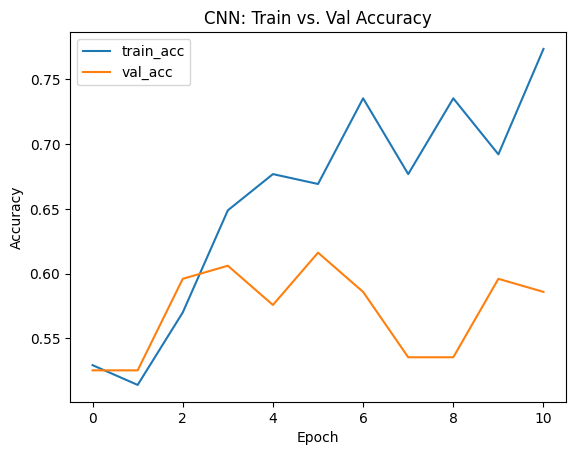

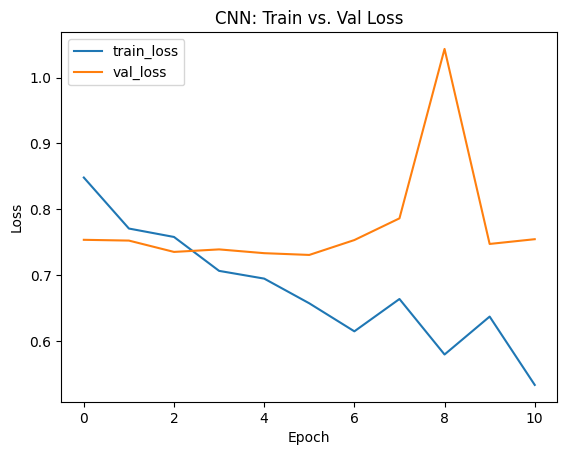

In [162]:
import matplotlib.pyplot as plt

# Plot train vs. val accuracy
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN: Train vs. Val Accuracy')
plt.show()

# Plot train vs. val loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('CNN: Train vs. Val Loss')
plt.show()


**Final Predictions using TestSet**

In [171]:
X = test_images.drop(columns=['Image ID'])

X = X.to_numpy().reshape(-1, 64, 64, 3)


In [185]:
# 1) Get predicted classes
import numpy as np
y_proba = cnn_model.predict(X, verbose=0)         # shape = (97, 3)
y_pred_int = np.argmax(y_proba, axis=1)                # shape = (97,)

print(y_pred_int, ["mapping:  0: Alex,  1: Hunter,  2: Kelly"])

[0 0 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2] ['mapping:  0: Alex,  1: Hunter,  2: Kelly']
[0 0 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2] ['mapping:  0: Alex,  1: Hunter,  2: Kelly']
